# **Exploratory Data Analysis in Python using pandas**

We will now perform an Exploratory Data Analysis on web data we earlier scraped for NBA player stats as obtained from https://www.basketball-reference.com/leagues/NBA_2020_per_game.html

## **Web scraping data using pandas**

The following block of code will retrieve the "2019-20 NBA Player Stats: Per Game" data from http://www.basketball-reference.com/.

In [6]:
import pandas as pd

# Retrieve HTML table data
url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'
html = pd.read_html(url, header = 0)
df2020 = html[0]

# Data cleaning
raw = df2020.drop(df2020[df2020.Age == 'Age'].index)
raw

Rk                    Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
0      1              Steven Adams   C  26  OKC  63  63  26.7  4.5   7.6  ...   
1      2               Bam Adebayo  PF  22  MIA  72  72  33.6  6.1  11.0  ...   
2      3         LaMarcus Aldridge   C  34  SAS  53  53  33.1  7.4  15.0  ...   
3      4            Kyle Alexander   C  23  MIA   2   0   6.5  0.5   1.0  ...   
4      5  Nickeil Alexander-Walker  SG  21  NOP  47   1  12.6  2.1   5.7  ...   
..   ...                       ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   
672  525                Trae Young  PG  21  ATL  60  60  35.3  9.1  20.8  ...   
673  526               Cody Zeller   C  27  CHO  58  39  23.1  4.3   8.3  ...   
674  527              Tyler Zeller   C  30  SAS   2   0   2.0  0.5   2.0  ...   
675  528                Ante Žižić   C  23  CLE  22   0  10.0  1.9   3.3  ...   
676  529               Ivica Zubac   C  22  LAC  72  70  18.4  3.3   5.3  ...   

      FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    .582  3.3  6.0   9.3  2.3  0.8  1.1  1.5  1.9  10.9  
1    .691  2.4  7.8  10.2  5.1  1.1  1.3  2.8  2.5  15.9  
2    .827  1.9  5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  
3     NaN  1.0  0.5   1.5  0.0  0.0  0.0  0.5  0.5   1.0  
4    .676  0.2  1.6   1.8  1.9  0.4  0.2  1.1  1.2   5.7  
..    ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  
672  .860  0.5  3.7   4.3  9.3  1.1  0.1  4.8  1.7  29.6  
673  .682  2.8  4.3   7.1  1.5  0.7  0.4  1.3  2.4  11.1  
674   NaN  1.5  0.5   2.0  0.0  0.0  0.0  0.0  0.0   1.0  
675  .737  0.8  2.2   3.0  0.3  0.3  0.2  0.5  1.2   4.4  
676  .747  2.7  4.8   7.5  1.1  0.2  0.9  0.8  2.3   8.3  

[651 rows x 30 columns]

## **Acronyms**


Acronym | Description
---|---
Rk | Rank
Pos | Position
Age | Player's age on February 1 of the season
Tm | Team
G | Games
GS | Games Started
MP | Minutes Played Per Game
FG | Field Goals Per Game
FGA | Field Goal Attempts Per Game
FG% | Field Goal Percentage
3P | 3-Point Field Goals Per Game
3PA | 3-Point Field Goal Attempts Per Game
3P% | FG% on 3-Pt FGAs.
2P | 2-Point Field Goals Per Game
2PA | 2-Point Field Goal Attempts Per Game
2P% | FG% on 2-Pt FGAs.
eFG% | Effective Field Goal Percentage
| *(Note: This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.)*
FT | Free Throws Per Game
FTA | Free Throw Attempts Per Game
FT% | Free Throw Percentage
ORB | Offensive Rebounds Per Game
DRB | Defensive Rebounds Per Game
TRB | Total Rebounds Per Game
AST | Assists Per Game
STL | Steals Per Game
BLK | Blocks Per Game
TOV | Turnovers Per Game
PF | Personal Fouls Per Game
PTS | Points Per Game

## **Data cleaning**

### Data dimension

In [7]:
raw.shape

(651, 30)

### Dataframe contents

In [8]:
raw.head()

Rk                    Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
0  1              Steven Adams   C  26  OKC  63  63  26.7  4.5   7.6  ...   
1  2               Bam Adebayo  PF  22  MIA  72  72  33.6  6.1  11.0  ...   
2  3         LaMarcus Aldridge   C  34  SAS  53  53  33.1  7.4  15.0  ...   
3  4            Kyle Alexander   C  23  MIA   2   0   6.5  0.5   1.0  ...   
4  5  Nickeil Alexander-Walker  SG  21  NOP  47   1  12.6  2.1   5.7  ...   

    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  .582  3.3  6.0   9.3  2.3  0.8  1.1  1.5  1.9  10.9  
1  .691  2.4  7.8  10.2  5.1  1.1  1.3  2.8  2.5  15.9  
2  .827  1.9  5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  
3   NaN  1.0  0.5   1.5  0.0  0.0  0.0  0.5  0.5   1.0  
4  .676  0.2  1.6   1.8  1.9  0.4  0.2  1.1  1.2   5.7  

[5 rows x 30 columns]

### Check for missing values

In [9]:
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        2
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%        6
eFG%       2
FT         0
FTA        0
FT%       33
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

### Replace missing values with 0 

In [10]:
df = raw.fillna(0)

In [11]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [12]:
df = df.drop(['Rk'], axis=1)
df

Player Pos Age   Tm   G  GS    MP   FG   FGA   FG%  \
0                Steven Adams   C  26  OKC  63  63  26.7  4.5   7.6  .592   
1                 Bam Adebayo  PF  22  MIA  72  72  33.6  6.1  11.0  .557   
2           LaMarcus Aldridge   C  34  SAS  53  53  33.1  7.4  15.0  .493   
3              Kyle Alexander   C  23  MIA   2   0   6.5  0.5   1.0  .500   
4    Nickeil Alexander-Walker  SG  21  NOP  47   1  12.6  2.1   5.7  .368   
..                        ...  ..  ..  ...  ..  ..   ...  ...   ...   ...   
672                Trae Young  PG  21  ATL  60  60  35.3  9.1  20.8  .437   
673               Cody Zeller   C  27  CHO  58  39  23.1  4.3   8.3  .524   
674              Tyler Zeller   C  30  SAS   2   0   2.0  0.5   2.0  .250   
675                Ante Žižić   C  23  CLE  22   0  10.0  1.9   3.3  .569   
676               Ivica Zubac   C  22  LAC  72  70  18.4  3.3   5.3  .613   

     ...   FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    ...  .582  3.3  6.0   9.3  2.3  0.8  1.1  1.5  1.9  10.9  
1    ...  .691  2.4  7.8  10.2  5.1  1.1  1.3  2.8  2.5  15.9  
2    ...  .827  1.9  5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  
3    ...     0  1.0  0.5   1.5  0.0  0.0  0.0  0.5  0.5   1.0  
4    ...  .676  0.2  1.6   1.8  1.9  0.4  0.2  1.1  1.2   5.7  
..   ...   ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  
672  ...  .860  0.5  3.7   4.3  9.3  1.1  0.1  4.8  1.7  29.6  
673  ...  .682  2.8  4.3   7.1  1.5  0.7  0.4  1.3  2.4  11.1  
674  ...     0  1.5  0.5   2.0  0.0  0.0  0.0  0.0  0.0   1.0  
675  ...  .737  0.8  2.2   3.0  0.3  0.3  0.2  0.5  1.2   4.4  
676  ...  .747  2.7  4.8   7.5  1.1  0.2  0.9  0.8  2.3   8.3  

[651 rows x 29 columns]

### Write to CSV file

In [14]:
df.to_csv('nba2020.csv', index=False)

## **Exploratory Data Analysis**

### Read data

In [23]:
df = pd.read_csv('nba2020.csv')

#### Displays the dataframe

In [ ]:
df

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
0    Álex Abrines  SG   25  OKC  31   2  ...  0.6  0.5  0.2  0.5  1.7   5.3
1      Quincy Acy  PF   28  PHO  10   0  ...  0.8  0.1  0.4  0.4  2.4   1.7
2    Jaylen Adams  PG   22  ATL  34   1  ...  1.9  0.4  0.1  0.8  1.3   3.2
3    Steven Adams   C   25  OKC  80  80  ...  1.6  1.5  1.0  1.7  2.6  13.9
4     Bam Adebayo   C   21  MIA  82  28  ...  2.2  0.9  0.8  1.5  2.5   8.9
..            ...  ..  ...  ...  ..  ..  ...  ...  ...  ...  ...  ...   ...
703  Tyler Zeller   C   29  MEM   4   1  ...  0.8  0.3  0.8  1.0  4.0  11.5
704    Ante Žižić   C   22  CLE  59  25  ...  0.9  0.2  0.4  1.0  1.9   7.8
705   Ivica Zubac   C   21  TOT  59  37  ...  1.1  0.2  0.9  1.2  2.3   8.9
706   Ivica Zubac   C   21  LAL  33  12  ...  0.8  0.1  0.8  1.0  2.2   8.5
707   Ivica Zubac   C   21  LAC  26  25  ...  1.5  0.4  0.9  1.4  2.5   9.4

[708 rows x 29 columns]

If we want to see more...

In [24]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [25]:
df

Player    Pos  Age   Tm   G  GS    MP    FG   FGA  \
0                Steven Adams      C   26  OKC  63  63  26.7   4.5   7.6   
1                 Bam Adebayo     PF   22  MIA  72  72  33.6   6.1  11.0   
2           LaMarcus Aldridge      C   34  SAS  53  53  33.1   7.4  15.0   
3              Kyle Alexander      C   23  MIA   2   0   6.5   0.5   1.0   
4    Nickeil Alexander-Walker     SG   21  NOP  47   1  12.6   2.1   5.7   
5               Grayson Allen     SG   24  MEM  38   0  18.9   3.1   6.6   
6               Jarrett Allen      C   21  BRK  70  64  26.5   4.3   6.6   
7                Kadeem Allen     PG   27  NYK  10   0  11.7   1.9   4.4   
8             Al-Farouq Aminu     PF   29  ORL  18   2  21.1   1.4   4.8   
9             Justin Anderson     SG   26  BRK  10   1  10.7   1.0   3.8   
10              Kyle Anderson     SF   26  MEM  67  28  19.9   2.3   4.9   
11              Ryan Anderson      C   31  HOU   2   0   7.0   1.0   3.5   
12      Giannis Antetokounmpo     PF   25  MIL  63  63  30.4  10.9  19.7   
13       Kostas Antetokounmpo     PF   22  LAL   5   0   4.0   0.6   0.6   
14     Thanasis Antetokounmpo     SF   27  MIL  20   2   6.5   1.2   2.4   
15            Carmelo Anthony     PF   35  POR  58  58  32.8   5.8  13.5   
16                 OG Anunoby     SF   22  TOR  69  68  29.9   4.1   8.2   
17           Ryan Arcidiacono     PG   25  CHI  58   4  16.0   1.6   3.8   
18               Trevor Ariza     SF   34  TOT  53  21  28.2   2.7   6.1   
19               Trevor Ariza     SF   34  SAC  32   0  24.7   2.0   5.2   
20               Trevor Ariza     SF   34  POR  21  21  33.4   3.7   7.6   
21              D.J. Augustin     PG   32  ORL  57  13  24.9   3.2   8.1   
22              Deandre Ayton      C   21  PHO  38  32  32.5   8.2  14.9   
23               Dwayne Bacon     SG   24  CHO  39  11  17.6   2.2   6.3   
24          Marvin Bagley III      C   20  SAC  13   6  25.7   6.0  12.8   
25                 Lonzo Ball     PG   22  NOP  63  54  32.1   4.4  10.9   
26                   Mo Bamba      C   21  ORL  62   0  14.2   2.1   4.6   
27                 J.J. Barea     PG   35  DAL  29   6  15.5   2.9   7.1   
28            Harrison Barnes     PF   27  SAC  72  72  34.5   5.1  11.0   
29                 RJ Barrett     SG   19  NYK  56  55  30.4   5.2  13.0   
30                Will Barton     SF   29  DEN  58  58  33.0   5.7  12.7   
31           Keita Bates-Diop  PF-SF   24  TOT  44   0  16.9   2.3   5.3   
32           Keita Bates-Diop     PF   24  MIN  37   0  17.5   2.4   5.6   
33           Keita Bates-Diop     SF   24  DEN   7   0  14.0   1.9   4.0   
34              Nicolas Batum     SF   31  CHO  22   3  23.0   1.3   3.7   
35                Aron Baynes      C   33  PHO  42  28  22.2   4.4   9.1   
36              Kent Bazemore     SF   30  TOT  68  21  24.8   2.9   7.9   
37              Kent Bazemore     SF   30  POR  43  21  25.8   2.6   7.6   
38              Kent Bazemore     SF   30  SAC  25   0  23.1   3.5   8.3   
39              Darius Bazley     PF   19  OKC  61   9  18.5   2.0   5.2   
40               Bradley Beal     SG   26  WAS  57  57  36.0  10.4  22.9   
41              Malik Beasley     SG   23  TOT  55  14  22.0   4.1   9.7   
42              Malik Beasley     SG   23  DEN  41   0  18.2   2.9   7.3   
43              Malik Beasley     SG   23  MIN  14  14  33.1   7.9  16.6   
44            Marco Belinelli     SG   33  SAS  57   0  15.5   2.2   5.5   
45                Jordan Bell      C   25  TOT  29   0   8.8   1.2   2.3   
46                Jordan Bell      C   25  MIN  27   0   8.7   1.2   2.2   
47                Jordan Bell      C   25  MEM   2   0  10.5   1.5   3.5   
48            DeAndre' Bembry     SG   25  ATL  43   4  21.3   2.4   5.3   
49              Dragan Bender   PF-C   22  TOT  16   3  17.9   2.6   5.8   
50              Dragan Bender      C   22  MIL   7   0  13.0   1.4   3.0   
51              Dragan Bender     PF   22  GSW   9   3  21.7   3.4   7.

Reverting back to the default

In [26]:
pd.set_option('display.max_rows', 10)

In [27]:
df

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0                Steven Adams   C   26  OKC  63  63  26.7  4.5   7.6  0.592   
1                 Bam Adebayo  PF   22  MIA  72  72  33.6  6.1  11.0  0.557   
2           LaMarcus Aldridge   C   34  SAS  53  53  33.1  7.4  15.0  0.493   
3              Kyle Alexander   C   23  MIA   2   0   6.5  0.5   1.0  0.500   
4    Nickeil Alexander-Walker  SG   21  NOP  47   1  12.6  2.1   5.7  0.368   
..                        ...  ..  ...  ...  ..  ..   ...  ...   ...    ...   
646                Trae Young  PG   21  ATL  60  60  35.3  9.1  20.8  0.437   
647               Cody Zeller   C   27  CHO  58  39  23.1  4.3   8.3  0.524   
648              Tyler Zeller   C   30  SAS   2   0   2.0  0.5   2.0  0.250   
649                Ante Žižić   C   23  CLE  22   0  10.0  1.9   3.3  0.569   
650               Ivica Zubac   C   22  LAC  72  70  18.4  3.3   5.3  0.613   

     ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    ...  0.582  3.3  6.0   9.3  2.3  0.8  1.1  1.5  1.9  10.9  
1    ...  0.691  2.4  7.8  10.2  5.1  1.1  1.3  2.8  2.5  15.9  
2    ...  0.827  1.9  5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  
3    ...  0.000  1.0  0.5   1.5  0.0  0.0  0.0  0.5  0.5   1.0  
4    ...  0.676  0.2  1.6   1.8  1.9  0.4  0.2  1.1  1.2   5.7  
..   ...    ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  
646  ...  0.860  0.5  3.7   4.3  9.3  1.1  0.1  4.8  1.7  29.6  
647  ...  0.682  2.8  4.3   7.1  1.5  0.7  0.4  1.3  2.4  11.1  
648  ...  0.000  1.5  0.5   2.0  0.0  0.0  0.0  0.0  0.0   1.0  
649  ...  0.737  0.8  2.2   3.0  0.3  0.3  0.2  0.5  1.2   4.4  
650  ...  0.747  2.7  4.8   7.5  1.1  0.2  0.9  0.8  2.3   8.3  

[651 rows x 29 columns]

### Overview of data types of each columns in the dataframe

In [28]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
           ...   
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Length: 29, dtype: object

### Show specific data types in dataframe

In [29]:
df.select_dtypes(include=['number'])

Age   G  GS    MP   FG   FGA    FG%   3P  3PA    3P%  ...    FT%  ORB  \
0     26  63  63  26.7  4.5   7.6  0.592  0.0  0.0  0.333  ...  0.582  3.3   
1     22  72  72  33.6  6.1  11.0  0.557  0.0  0.2  0.143  ...  0.691  2.4   
2     34  53  53  33.1  7.4  15.0  0.493  1.2  3.0  0.389  ...  0.827  1.9   
3     23   2   0   6.5  0.5   1.0  0.500  0.0  0.0  0.000  ...  0.000  1.0   
4     21  47   1  12.6  2.1   5.7  0.368  1.0  2.8  0.346  ...  0.676  0.2   
..   ...  ..  ..   ...  ...   ...    ...  ...  ...    ...  ...    ...  ...   
646   21  60  60  35.3  9.1  20.8  0.437  3.4  9.5  0.361  ...  0.860  0.5   
647   27  58  39  23.1  4.3   8.3  0.524  0.3  1.3  0.240  ...  0.682  2.8   
648   30   2   0   2.0  0.5   2.0  0.250  0.0  0.0  0.000  ...  0.000  1.5   
649   23  22   0  10.0  1.9   3.3  0.569  0.0  0.0  0.000  ...  0.737  0.8   
650   22  72  70  18.4  3.3   5.3  0.613  0.0  0.0  0.000  ...  0.747  2.7   

     DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    6.0   9.3  2.3  0.8  1.1  1.5  1.9  10.9  
1    7.8  10.2  5.1  1.1  1.3  2.8  2.5  15.9  
2    5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  
3    0.5   1.5  0.0  0.0  0.0  0.5  0.5   1.0  
4    1.6   1.8  1.9  0.4  0.2  1.1  1.2   5.7  
..   ...   ...  ...  ...  ...  ...  ...   ...  
646  3.7   4.3  9.3  1.1  0.1  4.8  1.7  29.6  
647  4.3   7.1  1.5  0.7  0.4  1.3  2.4  11.1  
648  0.5   2.0  0.0  0.0  0.0  0.0  0.0   1.0  
649  2.2   3.0  0.3  0.3  0.2  0.5  1.2   4.4  
650  4.8   7.5  1.1  0.2  0.9  0.8  2.3   8.3  

[651 rows x 26 columns]

In [30]:
df.select_dtypes(include=['object'])

Player Pos   Tm
0                Steven Adams   C  OKC
1                 Bam Adebayo  PF  MIA
2           LaMarcus Aldridge   C  SAS
3              Kyle Alexander   C  MIA
4    Nickeil Alexander-Walker  SG  NOP
..                        ...  ..  ...
646                Trae Young  PG  ATL
647               Cody Zeller   C  CHO
648              Tyler Zeller   C  SAS
649                Ante Žižić   C  CLE
650               Ivica Zubac   C  LAC

[651 rows x 3 columns]

## **QUESTIONS**

### **Conditional Selection**

In performing exploratory data analysis, it is important to be able to select subsets of data to perform analysis or comparisons.

**Which player scored the most Points (PTS) Per Game?**
Here, we will return the entire row.

In [31]:
df[df.PTS == df.PTS.max()]

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...    FT%  \
257  James Harden  SG   30  HOU  68  68  36.5  9.9  22.3  0.444  ...  0.865   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
257  1.0  5.5  6.6  7.5  1.8  0.9  4.5  3.3  34.3  

[1 rows x 29 columns]

We will return specific column values.

Further question, what team is the player from? 

In [32]:
PlayerMaxPoints = df[df.PTS == df.PTS.max()]
PlayerMaxPoints.Tm

257    HOU
Name: Tm, dtype: object

Which position is the player playing as?

In [33]:
PlayerMaxPoints.Pos

257    SG
Name: Pos, dtype: object

How many games did the player played in the season?

In [34]:
PlayerMaxPoints.G

257    68
Name: G, dtype: int64

**Which player scored more than 20 Points (PTS) Per Game?**

In [35]:
df[df.PTS > 20]

Player Pos  Age   Tm   G  GS    MP    FG   FGA    FG%  \
12   Giannis Antetokounmpo  PF   25  MIL  63  63  30.4  10.9  19.7  0.553   
40            Bradley Beal  SG   26  WAS  57  57  36.0  10.4  22.9  0.455   
43           Malik Beasley  SG   23  MIN  14  14  33.1   7.9  16.6  0.472   
60        Bojan Bogdanović  SF   30  UTA  63  63  33.1   6.6  14.8  0.447   
68            Devin Booker  SG   23  PHO  70  70  35.9   9.0  18.3  0.489   
..                     ...  ..  ...  ...  ..  ..   ...   ...   ...    ...   
623      Russell Westbrook  PG   31  HOU  57  57  35.9  10.6  22.5  0.472   
627         Andrew Wiggins  SF   24  TOT  54  54  34.4   8.1  18.1  0.447   
628         Andrew Wiggins  SF   24  MIN  42  42  34.6   8.4  18.8  0.444   
639        Zion Williamson  PF   19  NOP  24  24  27.8   8.8  15.0  0.583   
646             Trae Young  PG   21  ATL  60  60  35.3   9.1  20.8  0.437   

     ...    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
12   ...  0.633  2.2  11.4  13.6  5.6  1.0  1.0  3.7  3.1  29.5  
40   ...  0.842  0.9   3.3   4.2  6.1  1.2  0.4  3.4  2.2  30.5  
43   ...  0.750  0.6   4.4   5.1  1.9  0.6  0.1  1.5  1.9  20.7  
60   ...  0.903  0.6   3.5   4.1  2.1  0.5  0.1  2.5  1.7  20.2  
68   ...  0.919  0.4   3.8   4.2  6.5  0.7  0.3  3.8  3.0  26.6  
..   ...    ...  ...   ...   ...  ...  ...  ...  ...  ...   ...  
623  ...  0.763  1.8   6.2   7.9  7.0  1.6  0.4  4.5  3.5  27.2  
627  ...  0.709  1.2   3.9   5.1  3.7  0.8  1.0  2.4  2.4  21.8  
628  ...  0.720  1.1   4.1   5.2  3.7  0.7  0.9  2.5  2.4  22.4  
639  ...  0.640  2.7   3.6   6.3  2.1  0.7  0.4  2.5  1.8  22.5  
646  ...  0.860  0.5   3.7   4.3  9.3  1.1  0.1  4.8  1.7  29.6  

[39 rows x 29 columns]

**Which player had the highest 3-Point Field Goals Per Game (3P) ?**

In [36]:
df[df['3P'] == df['3P'].max()]

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...    FT%  \
257  James Harden  SG   30  HOU  68  68  36.5  9.9  22.3  0.444  ...  0.865   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
257  1.0  5.5  6.6  7.5  1.8  0.9  4.5  3.3  34.3  

[1 rows x 29 columns]

**Which player had the highest Assists Per Game (AST) ?**

In [37]:
df[df['AST'] == df['AST'].max()]

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...    FT%  \
319  LeBron James  PG   35  LAL  67  67  34.6  9.6  19.4  0.493  ...  0.693   

     ORB  DRB  TRB   AST  STL  BLK  TOV   PF   PTS  
319  1.0  6.9  7.8  10.2  1.2  0.5  3.9  1.8  25.3  

[1 rows x 29 columns]

### **GroupBy() function**

**Which player scored the highest (PTS) in the Los Angeles Lakers?**

In [38]:
LAL = df.groupby('Tm').get_group('LAL')

In [39]:
LAL[LAL.PTS == LAL.PTS.max()]

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...    FT%  \
162  Anthony Davis  PF   26  LAL  62  62  34.4  8.9  17.7  0.503  ...  0.846   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
162  2.3  7.0  9.3  3.2  1.5  2.3  2.5  2.5  26.1  

[1 rows x 29 columns]

**Of the 5 positions, which position scores the most points?**

We first group players by their positions.

In [40]:
df.groupby('Pos').PTS.describe()

count       mean       std  min    25%    50%     75%   max
Pos                                                               
C      134.0   7.647015  5.234511  0.0  4.125   6.35   9.625  26.5
C-PF     1.0   4.300000       NaN  4.3  4.300   4.30   4.300   4.3
PF     138.0   7.657971  6.182655  0.0  3.000   5.70  11.575  29.5
PF-C     5.0   7.860000  3.688902  2.4  6.700   8.40   9.400  12.4
PF-SF    3.0   4.700000  2.535744  1.8  3.800   5.80   6.150   6.5
...      ...        ...       ...  ...    ...    ...     ...   ...
SF-PF    3.0  10.300000  6.502307  3.7  7.100  10.50  13.600  16.7
SF-SG    2.0  10.800000  5.939697  6.6  8.700  10.80  12.900  15.0
SG     143.0   8.667832  6.328436  0.0  3.850   7.50  12.100  34.3
SG-PG    2.0   9.600000  3.252691  7.3  8.450   9.60  10.750  11.9
SG-SF    1.0   4.600000       NaN  4.6  4.600   4.60   4.600   4.6

[14 rows x 8 columns]

We will now show only the 5 traditional positions (those having combo positions will be removed from the analysis).

In [41]:
positions = ['C','PF','SF','PG','SG']
POS = df[ df['Pos'].isin(positions)  ]
POS

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0                Steven Adams   C   26  OKC  63  63  26.7  4.5   7.6  0.592   
1                 Bam Adebayo  PF   22  MIA  72  72  33.6  6.1  11.0  0.557   
2           LaMarcus Aldridge   C   34  SAS  53  53  33.1  7.4  15.0  0.493   
3              Kyle Alexander   C   23  MIA   2   0   6.5  0.5   1.0  0.500   
4    Nickeil Alexander-Walker  SG   21  NOP  47   1  12.6  2.1   5.7  0.368   
..                        ...  ..  ...  ...  ..  ..   ...  ...   ...    ...   
646                Trae Young  PG   21  ATL  60  60  35.3  9.1  20.8  0.437   
647               Cody Zeller   C   27  CHO  58  39  23.1  4.3   8.3  0.524   
648              Tyler Zeller   C   30  SAS   2   0   2.0  0.5   2.0  0.250   
649                Ante Žižić   C   23  CLE  22   0  10.0  1.9   3.3  0.569   
650               Ivica Zubac   C   22  LAC  72  70  18.4  3.3   5.3  0.613   

     ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    ...  0.582  3.3  6.0   9.3  2.3  0.8  1.1  1.5  1.9  10.9  
1    ...  0.691  2.4  7.8  10.2  5.1  1.1  1.3  2.8  2.5  15.9  
2    ...  0.827  1.9  5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  
3    ...  0.000  1.0  0.5   1.5  0.0  0.0  0.0  0.5  0.5   1.0  
4    ...  0.676  0.2  1.6   1.8  1.9  0.4  0.2  1.1  1.2   5.7  
..   ...    ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  
646  ...  0.860  0.5  3.7   4.3  9.3  1.1  0.1  4.8  1.7  29.6  
647  ...  0.682  2.8  4.3   7.1  1.5  0.7  0.4  1.3  2.4  11.1  
648  ...  0.000  1.5  0.5   2.0  0.0  0.0  0.0  0.0  0.0   1.0  
649  ...  0.737  0.8  2.2   3.0  0.3  0.3  0.2  0.5  1.2   4.4  
650  ...  0.747  2.7  4.8   7.5  1.1  0.2  0.9  0.8  2.3   8.3  

[632 rows x 29 columns]

Now, let's take a look at the descriptive statistics.

In [42]:
POS.groupby('Pos').PTS.describe()

count       mean       std  min    25%   50%     75%   max
Pos                                                            
C    134.0   7.647015  5.234511  0.0  4.125  6.35   9.625  26.5
PF   138.0   7.657971  6.182655  0.0  3.000  5.70  11.575  29.5
PG   106.0  10.481132  7.377238  0.5  5.100  8.05  15.200  30.0
SF   111.0   8.393694  5.831689  0.0  4.050  6.80  10.550  27.1
SG   143.0   8.667832  6.328436  0.0  3.850  7.50  12.100  34.3

### **Histograms**

We'll also try to answer this question by showing some histogram plots. So, to make it a bit easier, let's create a subset dataframe.

In [43]:
PTS = df[['Pos','PTS']]

positions = ['C','PF','SF','PG','SG']
PTS = PTS[ PTS['Pos'].isin(positions)  ]

PTS

Pos   PTS
0     C  10.9
1    PF  15.9
2     C  18.9
3     C   1.0
4    SG   5.7
..   ..   ...
646  PG  29.6
647   C  11.1
648   C   1.0
649   C   4.4
650   C   8.3

[632 rows x 2 columns]

#### **pandas built-in visualization**

array([[<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'PF'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'SF'}>],
       [<AxesSubplot:title={'center':'SG'}>, <AxesSubplot:>]],
      dtype=object)

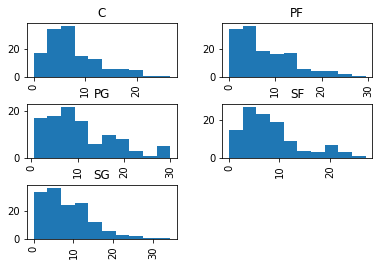

In [44]:
PTS['PTS'].hist(by=PTS['Pos'])

array([<AxesSubplot:title={'center':'C'}>,
       <AxesSubplot:title={'center':'PF'}>,
       <AxesSubplot:title={'center':'PG'}>,
       <AxesSubplot:title={'center':'SF'}>,
       <AxesSubplot:title={'center':'SG'}>], dtype=object)

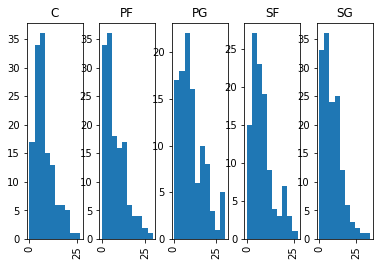

In [45]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5))

array([<AxesSubplot:title={'center':'C'}>,
       <AxesSubplot:title={'center':'PF'}>,
       <AxesSubplot:title={'center':'PG'}>,
       <AxesSubplot:title={'center':'SF'}>,
       <AxesSubplot:title={'center':'SG'}>], dtype=object)

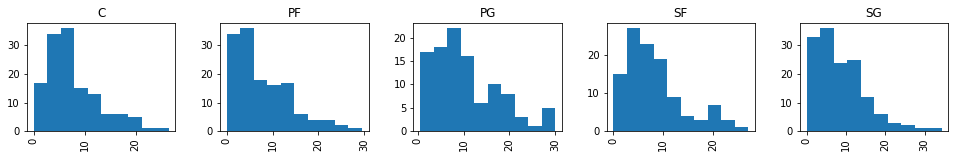

In [46]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5), figsize=(16,2))


#### **Seaborn data visualization**

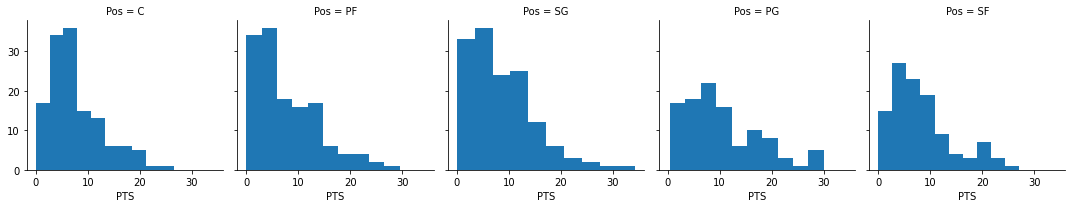

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(PTS, col="Pos")
g.map(plt.hist, "PTS");

### **Box plots**

#### **Box plot of points scored (PTS) grouped by Position**

##### **pandas built-in visualization**

<AxesSubplot:title={'center':'PTS'}, xlabel='Pos'>

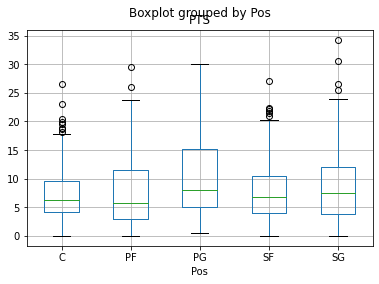

In [48]:
PTS.boxplot(column='PTS', by='Pos')

##### **Seaborn data visualization**

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

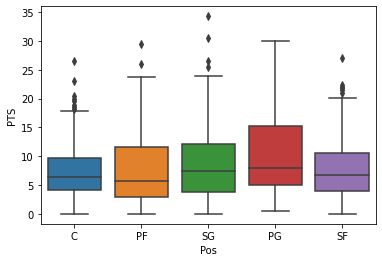

In [49]:
import seaborn as sns

sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

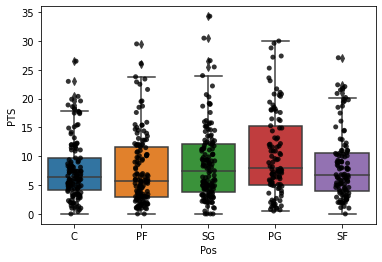

In [50]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
              jitter=True, 
              marker='o',
              alpha=0.8, 
              color="black")

### **Heat map**

#### Compute the correlation matrix

In [51]:
corr = df.corr()
corr

Age         G        GS        MP        FG       FGA       FG%  \
Age  1.000000  0.112074  0.086981  0.187944  0.093014  0.111467 -0.012770   
G    0.112074  1.000000  0.634800  0.632346  0.520625  0.502973  0.241420   
GS   0.086981  0.634800  1.000000  0.769980  0.712433  0.697719  0.175034   
MP   0.187944  0.632346  0.769980  1.000000  0.880861  0.888803  0.201169   
FG   0.093014  0.520625  0.712433  0.880861  1.000000  0.975769  0.275202   
..        ...       ...       ...       ...       ...       ...       ...   
STL  0.119281  0.429177  0.549143  0.722303  0.617060  0.627226  0.088195   
BLK  0.056369  0.269456  0.351951  0.397804  0.391933  0.299843  0.375639   
TOV  0.086540  0.408157  0.618530  0.770935  0.844707  0.849331  0.169142   
PF   0.120923  0.437002  0.551070  0.737966  0.618267  0.578788  0.333590   
PTS  0.111290  0.514799  0.706195  0.881214  0.988500  0.982872  0.222546   

           3P       3PA       3P%  ...       FT%       ORB       DRB  \
Age  0.206767  0.203697  0.153164  ...  0.092365  0.012826  0.145914   
G    0.412623  0.392584  0.297786  ...  0.350294  0.289908  0.458982   
GS   0.488025  0.486009  0.189690  ...  0.227115  0.390371  0.632457   
MP   0.690791  0.700254  0.322447  ...  0.390727  0.410920  0.733633   
FG   0.660079  0.662039  0.283863  ...  0.315092  0.431840  0.716891   
..        ...       ...       ...  ...       ...       ...       ...   
STL  0.443822  0.464486  0.190777  ...  0.253761  0.262531  0.523385   
BLK  0.007820  0.014133 -0.016531  ...  0.065792  0.680002  0.649904   
TOV  0.540046  0.571961  0.188398  ...  0.258927  0.347922  0.637919   
PF   0.356086  0.364801  0.148462  ...  0.272812  0.563186  0.718757   
PTS  0.723893  0.728147  0.305936  ...  0.348214  0.362488  0.684398   

          TRB       AST       STL       BLK       TOV        PF       PTS  
Age  0.113539  0.157002  0.119281  0.056369  0.086540  0.120923  0.111290  
G    0.435172  0.397120  0.429177  0.269456  0.408157  0.437002  0.514799  
GS   0.596061  0.552719  0.549143  0.351951  0.618530  0.551070  0.706195  
MP   0.678810  0.688403  0.722303  0.397804  0.770935  0.737966  0.881214  
FG   0.672578  0.711258  0.617060  0.391933  0.844707  0.618267  0.988500  
..        ...       ...       ...       ...       ...       ...       ...  
STL  0.475087  0.607379  1.000000  0.313740  0.635085  0.543077  0.617227  
BLK  0.695333  0.076693  0.313740  1.000000  0.296467  0.576714  0.347116  
TOV  0.587080  0.830723  0.635085  0.296467  1.000000  0.564672  0.854511  
PF   0.712118  0.370388  0.543077  0.576714  0.564672  1.000000  0.596922  
PTS  0.627422  0.732807  0.617227  0.347116  0.854511  0.596922  1.000000  

[26 rows x 26 columns]

#### Make the heat map

<AxesSubplot:>

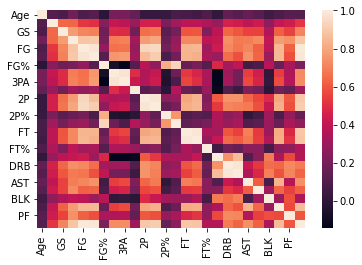

In [52]:
sns.heatmap(corr)

#### Adjust figure size of heat map

<AxesSubplot:>

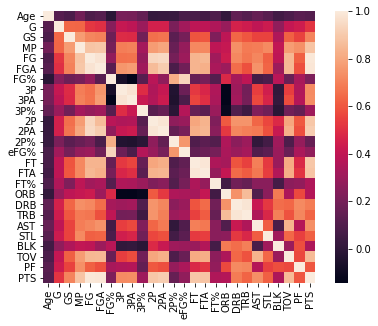

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

#### Mask diagonal half of heat map (Diagonal correlation matrix)

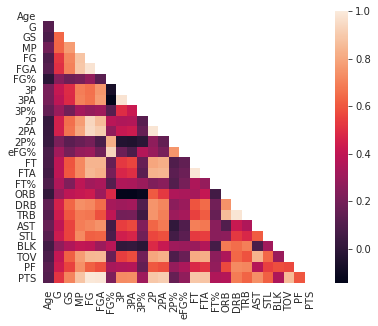

In [54]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

import numpy as np
import seaborn as sns

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

### **Scatter Plot**

In [55]:
df

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0                Steven Adams   C   26  OKC  63  63  26.7  4.5   7.6  0.592   
1                 Bam Adebayo  PF   22  MIA  72  72  33.6  6.1  11.0  0.557   
2           LaMarcus Aldridge   C   34  SAS  53  53  33.1  7.4  15.0  0.493   
3              Kyle Alexander   C   23  MIA   2   0   6.5  0.5   1.0  0.500   
4    Nickeil Alexander-Walker  SG   21  NOP  47   1  12.6  2.1   5.7  0.368   
..                        ...  ..  ...  ...  ..  ..   ...  ...   ...    ...   
646                Trae Young  PG   21  ATL  60  60  35.3  9.1  20.8  0.437   
647               Cody Zeller   C   27  CHO  58  39  23.1  4.3   8.3  0.524   
648              Tyler Zeller   C   30  SAS   2   0   2.0  0.5   2.0  0.250   
649                Ante Žižić   C   23  CLE  22   0  10.0  1.9   3.3  0.569   
650               Ivica Zubac   C   22  LAC  72  70  18.4  3.3   5.3  0.613   

     ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    ...  0.582  3.3  6.0   9.3  2.3  0.8  1.1  1.5  1.9  10.9  
1    ...  0.691  2.4  7.8  10.2  5.1  1.1  1.3  2.8  2.5  15.9  
2    ...  0.827  1.9  5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  
3    ...  0.000  1.0  0.5   1.5  0.0  0.0  0.0  0.5  0.5   1.0  
4    ...  0.676  0.2  1.6   1.8  1.9  0.4  0.2  1.1  1.2   5.7  
..   ...    ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  
646  ...  0.860  0.5  3.7   4.3  9.3  1.1  0.1  4.8  1.7  29.6  
647  ...  0.682  2.8  4.3   7.1  1.5  0.7  0.4  1.3  2.4  11.1  
648  ...  0.000  1.5  0.5   2.0  0.0  0.0  0.0  0.0  0.0   1.0  
649  ...  0.737  0.8  2.2   3.0  0.3  0.3  0.2  0.5  1.2   4.4  
650  ...  0.747  2.7  4.8   7.5  1.1  0.2  0.9  0.8  2.3   8.3  

[651 rows x 29 columns]

#### Select columns if they have numerical data types

In [56]:
df.select_dtypes(include=['number'])

Age   G  GS    MP   FG   FGA    FG%   3P  3PA    3P%  ...    FT%  ORB  \
0     26  63  63  26.7  4.5   7.6  0.592  0.0  0.0  0.333  ...  0.582  3.3   
1     22  72  72  33.6  6.1  11.0  0.557  0.0  0.2  0.143  ...  0.691  2.4   
2     34  53  53  33.1  7.4  15.0  0.493  1.2  3.0  0.389  ...  0.827  1.9   
3     23   2   0   6.5  0.5   1.0  0.500  0.0  0.0  0.000  ...  0.000  1.0   
4     21  47   1  12.6  2.1   5.7  0.368  1.0  2.8  0.346  ...  0.676  0.2   
..   ...  ..  ..   ...  ...   ...    ...  ...  ...    ...  ...    ...  ...   
646   21  60  60  35.3  9.1  20.8  0.437  3.4  9.5  0.361  ...  0.860  0.5   
647   27  58  39  23.1  4.3   8.3  0.524  0.3  1.3  0.240  ...  0.682  2.8   
648   30   2   0   2.0  0.5   2.0  0.250  0.0  0.0  0.000  ...  0.000  1.5   
649   23  22   0  10.0  1.9   3.3  0.569  0.0  0.0  0.000  ...  0.737  0.8   
650   22  72  70  18.4  3.3   5.3  0.613  0.0  0.0  0.000  ...  0.747  2.7   

     DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0    6.0   9.3  2.3  0.8  1.1  1.5  1.9  10.9  
1    7.8  10.2  5.1  1.1  1.3  2.8  2.5  15.9  
2    5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  
3    0.5   1.5  0.0  0.0  0.0  0.5  0.5   1.0  
4    1.6   1.8  1.9  0.4  0.2  1.1  1.2   5.7  
..   ...   ...  ...  ...  ...  ...  ...   ...  
646  3.7   4.3  9.3  1.1  0.1  4.8  1.7  29.6  
647  4.3   7.1  1.5  0.7  0.4  1.3  2.4  11.1  
648  0.5   2.0  0.0  0.0  0.0  0.0  0.0   1.0  
649  2.2   3.0  0.3  0.3  0.2  0.5  1.2   4.4  
650  4.8   7.5  1.1  0.2  0.9  0.8  2.3   8.3  

[651 rows x 26 columns]

#### Select the first 5 columns (by index number)

In [57]:
number = df.select_dtypes(include=['number'])

In [58]:
number.iloc[:,:5]

Age   G  GS    MP   FG
0     26  63  63  26.7  4.5
1     22  72  72  33.6  6.1
2     34  53  53  33.1  7.4
3     23   2   0   6.5  0.5
4     21  47   1  12.6  2.1
..   ...  ..  ..   ...  ...
646   21  60  60  35.3  9.1
647   27  58  39  23.1  4.3
648   30   2   0   2.0  0.5
649   23  22   0  10.0  1.9
650   22  72  70  18.4  3.3

[651 rows x 5 columns]

#### Select 5 specific columns (by column names)

In [59]:
selections = ['Age', 'G', 'STL', 'BLK', 'AST', 'PTS']
df5 = df[selections]
df5

Age   G  STL  BLK  AST   PTS
0     26  63  0.8  1.1  2.3  10.9
1     22  72  1.1  1.3  5.1  15.9
2     34  53  0.7  1.6  2.4  18.9
3     23   2  0.0  0.0  0.0   1.0
4     21  47  0.4  0.2  1.9   5.7
..   ...  ..  ...  ...  ...   ...
646   21  60  1.1  0.1  9.3  29.6
647   27  58  0.7  0.4  1.5  11.1
648   30   2  0.0  0.0  0.0   1.0
649   23  22  0.3  0.2  0.3   4.4
650   22  72  0.2  0.9  1.1   8.3

[651 rows x 6 columns]

#### Make scatter plot grid

##### 5 columns

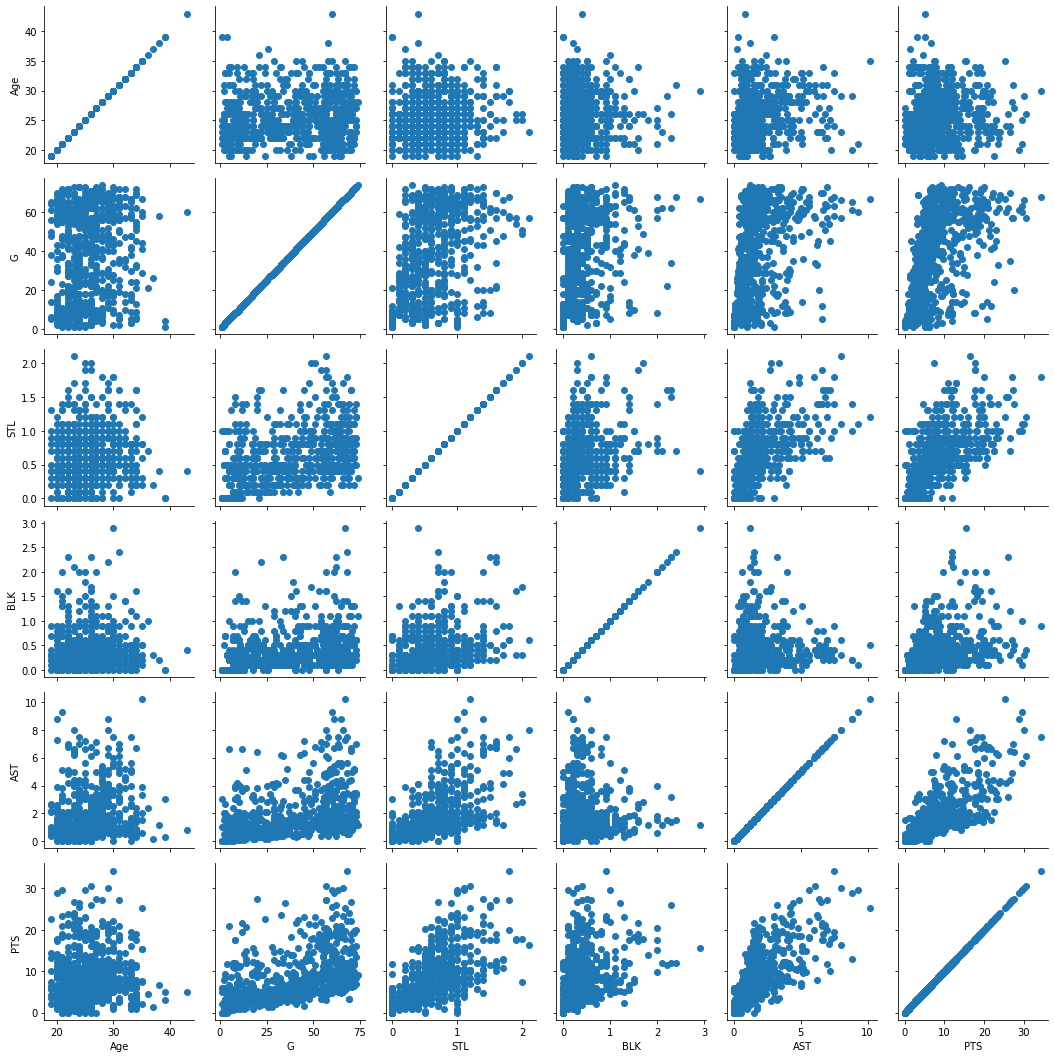

In [60]:
import seaborn as sns

g = sns.PairGrid(df5)
g.map(plt.scatter);

##### All columns

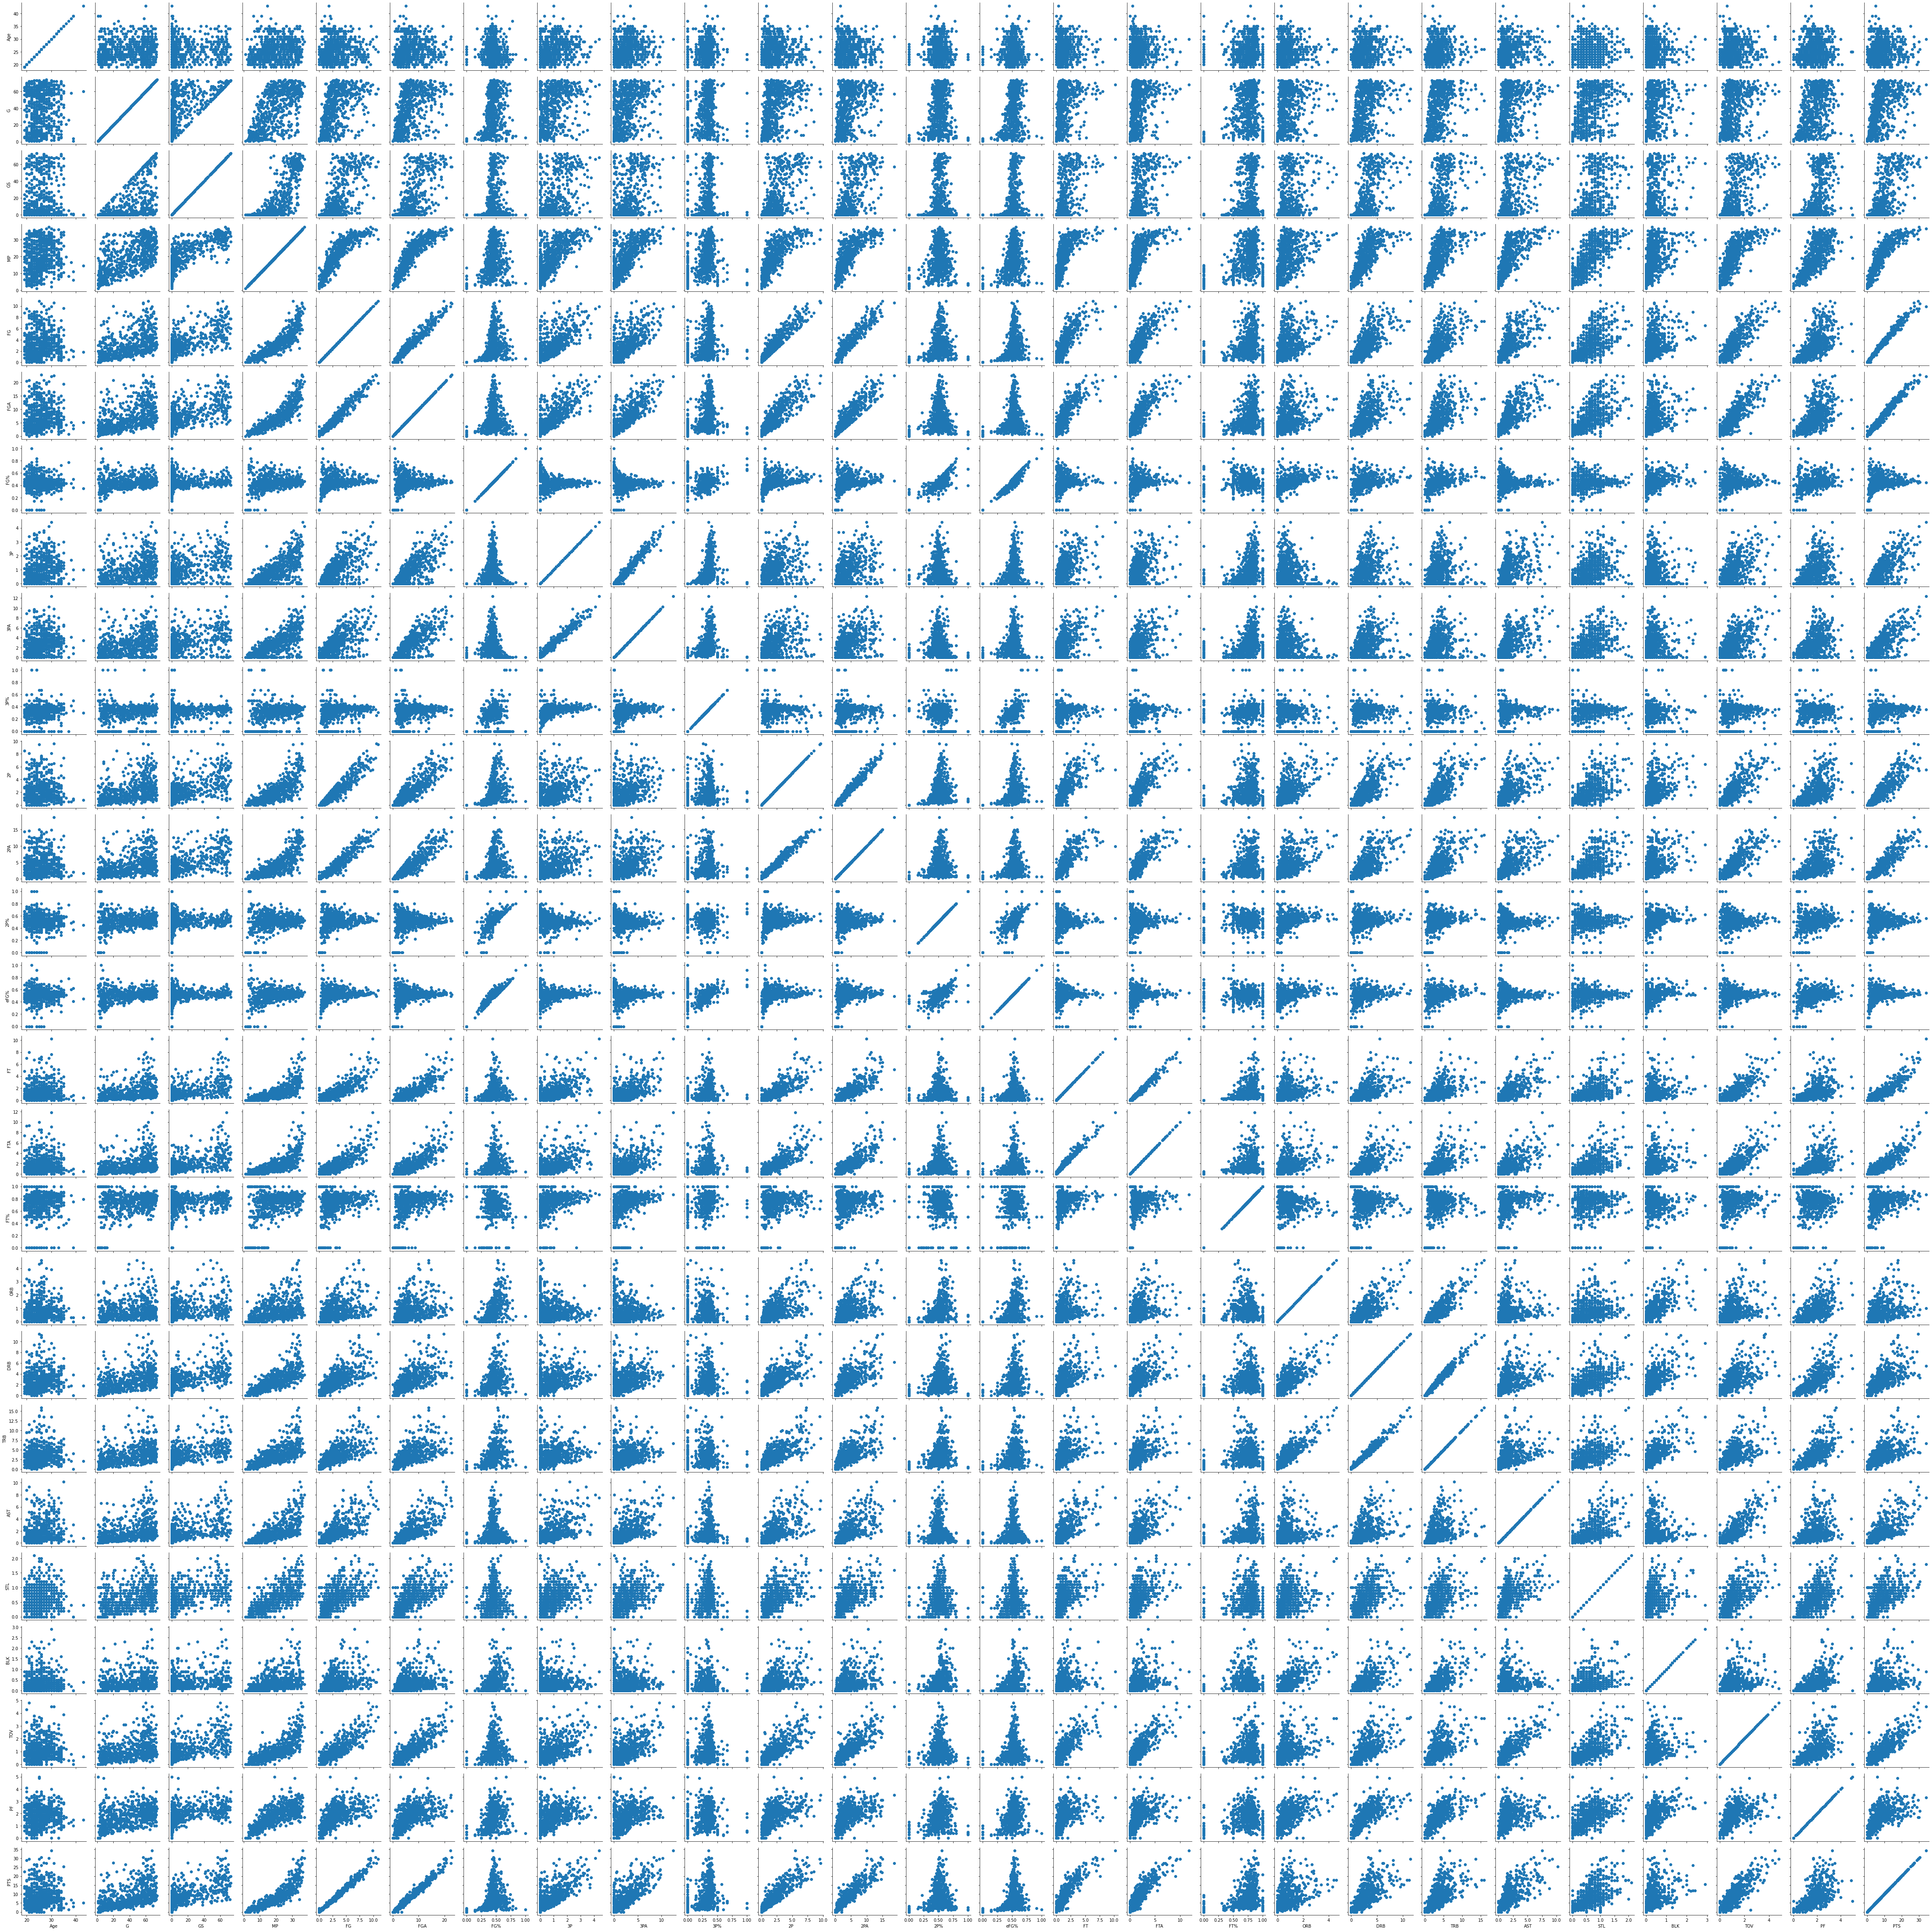

In [61]:
import seaborn as sns

g = sns.PairGrid(number)
g.map(plt.scatter);